The **entire course** uses a "**notebook" coding environment**.  In case you are unfamiliar with colab notebooks, we have a [90-second intro video](https://www.youtube.com/watch?v=4C2qMnaIKL4).

This content is prepared by <font color="darkgreen"><b>Rocky Jagtiani</b></font> (https://www.linkedin.com/in/rocky-jagtiani-3b390649/) for <font color="darkblue"><b>learners at Data Folkz</b></font>.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# The Pandas library

**From the Pandas documentation:**

**pandas** is everyone's favorite data analyis library providing fast, flexible, and expressive data structures designed to work with *relational* or table-like data (SQL table or Excel spreadsheet). It is a fundamental high-level building block for doing practical, real world data analysis in Python. 

pandas is well suited for:

- Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
- Ordered and unordered (not necessarily fixed-frequency) time series data.
- Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
- Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure

The two primary data structures of pandas, **Series** (1-dimensional) and **DataFrame** (2-dimensional), handle the vast majority of typical use cases in finance, statistics, social science, and many areas of engineering. Pandas is built on top of NumPy and is intended to integrate well within a scientific computing environment with many other 3rd party libraries.

<p>Here are just a few of the things that pandas does well:</p>
<blockquote>
<div><ul class="simple">
<li>Easy handling of <strong>missing data</strong> (represented as NaN) in floating point as
well as non-floating point data</li>
<li>Size mutability: columns can be <strong>inserted and deleted</strong> from DataFrame and
higher dimensional objects</li>
<li>Automatic and explicit <strong>data alignment</strong>: objects can be explicitly
aligned to a set of labels, or the user can simply ignore the labels and
let <cite>Series</cite>, <cite>DataFrame</cite>, etc. automatically align the data for you in
computations</li>
<li>Powerful, flexible <strong>group by</strong> functionality to perform
split-apply-combine operations on data sets, for both aggregating and
transforming data</li>
<li>Make it <strong>easy to convert</strong> ragged, differently-indexed data in other
Python and NumPy data structures into DataFrame objects</li>
<li>Intelligent label-based <strong>slicing</strong>, <strong>fancy indexing</strong>, and <strong>subsetting</strong>
of large data sets</li>
<li>Intuitive <strong>merging</strong> and <strong>joining</strong> data sets</li>
<li>Flexible <strong>reshaping</strong> and pivoting of data sets</li>
<li><strong>Hierarchical</strong> labeling of axes (possible to have multiple labels per
tick)</li>
<li>Robust IO tools for loading data from <strong>flat files</strong> (CSV and delimited),
Excel files, databases, and saving / loading data from the ultrafast <strong>HDF5
format</strong></li>
<li><strong>Time series</strong>-specific functionality: date range generation and frequency
conversion, moving window statistics, moving window linear regressions,
date shifting and lagging, etc.</li>
</ul>
</div></blockquote>
<p>Many of these principles are here to address the shortcomings frequently
experienced using other languages / scientific research environments. For data
scientists, working with data is typically divided into multiple stages:
munging and cleaning data, analyzing / modeling it, then organizing the results
of the analysis into a form suitable for plotting or tabular display. pandas
is the ideal tool for all of these tasks.</p>

# Introducing the most important objects: Series and DataFrames

In [ ]:
# The importing convention
import pandas as pd

## The Pandas Series

The **Series** data structure in Pandas is a <i>one-dimensional labeled array</i>. 

* Data in the array can be of any type (integers, strings, floating point numbers, Python objects, etc.). 
* Data within the array is homogeneous
* Pandas Series objects always have an index: this gives them both ndarray-like and dict-like properties.

    
<img src="https://drive.google.com/uc?id=1Nm1y60k0lBwm-rXdZbx9ge8xocF0-Evs">

## Creating a Pandas Series

There are many ways to create a Pandas Series objects, some of the most common ways are:
- Creation from a list
- Creation from a dictionary
- Creation from a ndarray
- From an external source like a file

In [ ]:
# define the data and index as lists
temperature = [33, 19, 15, 89, 11, -5, 9]
days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

# create series 
series_from_list = pd.Series(temperature, index=days)
series_from_list

Mon    33
Tue    19
Wed    15
Thu    89
Fri    11
Sat    -5
Sun     9
dtype: int64

In [ ]:
# from a dictionary
my_dict = {'Mon': 33, 'Tue': 19, 'Wed': 15, 'Thu': 89, 'Fri': 11, 'Sat': -5, 'Sun': 9}
series_from_dict = pd.Series(my_dict)
series_from_dict

Mon    33
Tue    19
Wed    15
Thu    89
Fri    11
Sat    -5
Sun     9
dtype: int64

In [ ]:
# From a numpy array
my_array = np.linspace(0,10,15) #line - space would produce 15 equaly spaced no.s between 0 to 10
series_from_ndarray = pd.Series(my_array)
series_from_ndarray

0      0.000000
1      0.714286
2      1.428571
3      2.142857
4      2.857143
5      3.571429
6      4.285714
7      5.000000
8      5.714286
9      6.428571
10     7.142857
11     7.857143
12     8.571429
13     9.285714
14    10.000000
dtype: float64

In [ ]:
#Vectorized operations also work in pandas Series
np.exp(series_from_list)

# np.exp(x) -> The exponential function is e^x where e is a mathematical 
# constant called Euler's number, approximately 2.718281

# Note : we have series_from_list which has following values
#        33, 19, 15, 89, 11, -5, 9

Mon    2.146436e+14
Tue    1.784823e+08
Wed    3.269017e+06
Thu    4.489613e+38
Fri    5.987414e+04
Sat    6.737947e-03
Sun    8.103084e+03
dtype: float64

## Pandas DataFrames

DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects.

<img src="https://drive.google.com/uc?id=1AnS_4u7kG3bDxfQXsAgsAURVE04uVDYK">

You can create a DataFrame from:

* Dict of 1D ndarrays, lists, dicts, or Series
* 2-D numpy.ndarray
* From text, CSV, Excel files or databases
* Many other ways

Here's an example where we have set the Dates column to be the index and label for the rows. 

<img src="https://drive.google.com/uc?id=1rb6looxxB34EhTegA6Z8l0UWS0XnMBjt">

# Main properties, operations and manipulations 

## Reading the data

**Sample data: HR Employee Attrition and Performance** <br>
You can get it from here:

https://www.kaggle.com/patelprashant/employee-attrition#WA_Fn-UseC_-HR-Employee-Attrition.csv

or

https://drive.google.com/open?id=1RmGuRk3nfyFpuLepVIroVh3gEmM-nb7O

In [ ]:
# Steps to upload any data file into your Colab notebook. (its very simple !!)
# Step 1: Download the dataset from above given link to your local PC
# Step 2: Run the below code , select your file. It would get uploaded to your COlab Notebook.

from google.colab import files
files.upload()

Saving HR_Employee_Attrition.csv to HR_Employee_Attrition.csv


{'HR_Employee_Attrition.csv': b'\xef\xbb\xbfAge,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager\r\n41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5\r\n49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7\r\n37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2

In [ ]:
file_name = 'HR_Employee_Attrition.csv'
data = pd.read_csv(file_name, index_col='EmployeeNumber')
# here the rows are being indexed by one of the columns ->  'EmployeeNumber'
# all other column headings of the csv file would become columns.

data.head()

Age Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
EmployeeNumber                 ...                                              
1                41       Yes  ...                       0                     5
2                49        No  ...                       1                     7
4                37       Yes  ...                       0                     0
5                33        No  ...                       3                     0
7                27        No  ...                       2                     2

[5 rows x 34 columns]

## The anatomy of a DataFrame

A DataFrame consists on three parts:

1. Index
2. Columns Names (_`or`_ Column Index)
3. Data

The row and column labels can be accessed respectively by accessing the ``index`` and ``columns`` attributes:

In [ ]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
data.index

Int64Index([   1,    2,    4,    5,    7,    8,   10,   11,   12,   13,
            ...
            2054, 2055, 2056, 2057, 2060, 2061, 2062, 2064, 2065, 2068],
           dtype='int64', name='EmployeeNumber', length=1470)

In [ ]:
data.values

array([[41, 'Yes', 'Travel_Rarely', ..., 4, 0, 5],
       [49, 'No', 'Travel_Frequently', ..., 7, 1, 7],
       [37, 'Yes', 'Travel_Rarely', ..., 0, 0, 0],
       ...,
       [27, 'No', 'Travel_Rarely', ..., 2, 0, 3],
       [49, 'No', 'Travel_Frequently', ..., 6, 0, 8],
       [34, 'No', 'Travel_Rarely', ..., 3, 1, 2]], dtype=object)

## Inspecting your data

In [ ]:
data.head() # prints the first 5 data rows

Age Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
EmployeeNumber                 ...                                              
1                41       Yes  ...                       0                     5
2                49        No  ...                       1                     7
4                37       Yes  ...                       0                     0
5                33        No  ...                       3                     0
7                27        No  ...                       2                     2

[5 rows x 34 columns]

In [ ]:
data.tail()  # prints the last 5 data rows

Age Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
EmployeeNumber                 ...                                              
2061             36        No  ...                       0                     3
2062             39        No  ...                       1                     7
2064             27        No  ...                       0                     3
2065             49        No  ...                       0                     8
2068             34        No  ...                       1                     2

[5 rows x 34 columns]

## Selection, addition, deletion

You can treat a DataFrame like a dict of indexed Series objects. Getting, setting, and deleting columns works with the same syntax dictionary operations:

In [ ]:
# Getting one column: .head() is just to print the first 5 values
data['Age'].head()

EmployeeNumber
1    41
2    49
4    37
5    33
7    27
Name: Age, dtype: int64

In [ ]:
# Getting more than one column




In [ ]:
# Adding a column
data['AgeInMonths'] = 12*data['Age']
data['AgeInMonths'].head()

EmployeeNumber
1    492
2    588
4    444
5    396
7    324
Name: AgeInMonths, dtype: int64

In [ ]:
# Deleting a column
del data['AgeInMonths']

# the drop method can also be used
data.drop('EmployeeCount', axis=1, inplace=True)  
# axis = 1 means that we should search for 'EmployeeCount' column wise

In [ ]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Slices

In [ ]:
data['BusinessTravel'][10:15]  # slicing fetches records from index no. 10 to 15 
                               # we are only printing values of one column 'BusinessTravel'

EmployeeNumber
14    Travel_Rarely
15    Travel_Rarely
16    Travel_Rarely
18    Travel_Rarely
19    Travel_Rarely
Name: BusinessTravel, dtype: object

In [ ]:
data[10:15] # U can check the records at index no. 10 to 15
            # Please Note that : dataframes have two types of indexes : Implicit Indexing which goes from 0 to n-1
            # and other is explicit indexing. Here its EmployeeNumber                 

Age Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
EmployeeNumber                 ...                                              
14               35        No  ...                       0                     3
15               29        No  ...                       0                     8
16               31        No  ...                       4                     3
18               34        No  ...                       1                     2
19               28       Yes  ...                       0                     3

[5 rows x 33 columns]

### Selection by label

In [ ]:
selected_EmployeeNumbers = [15, 94, 337, 1120]

In [ ]:
data['YearsAtCompany'].loc[selected_EmployeeNumbers]  # loc means locating the records using explicit indexing
                                                      # iloc means locating the records using implicit indexing

# so we can see 'YearsAtCompany' for empNo.s 15,94,337 and 1120.

EmployeeNumber
15      9
94      5
337     2
1120    7
Name: YearsAtCompany, dtype: int64

In [ ]:
data.loc[selected_EmployeeNumbers] # fetching rows at explicit index i.e empNo. 15,94,337 and 1120 

Age Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
EmployeeNumber                 ...                                              
15               29        No  ...                       0                     8
94               29        No  ...                       0                     4
337              31        No  ...                       2                     2
1120             29        No  ...                       1                     7

[4 rows x 33 columns]

In [ ]:
# Getting a single value
data.loc[94,'YearsAtCompany']

5

It is also possible to select by position using the *iloc* method

## Answering simple questions about a dataset

The HR director asks you to answer a few descripive questions about employees, you use this dataset to answer them:

- How many employees are there by department in the dataset?
- What is the overall attrition rate?
- What is the average hourly rate?
- What is the average number of years at the company?
- Who are the 5 employees with the most number of years at the company?
- How satisfied are employees overall?

### How many employees are there by department in the dataset?

In [ ]:
# use value_counts() method 




### What is the overall attrition rate?

In [ ]:
# use value_counts()



In [ ]:
data['Attrition'].value_counts(normalize=True)  # value_counts reports in absolute sense
                                                # normalize=True normalises , hence we see o/p in range of 0 to 1

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

In [ ]:
attrition_rate = data['Attrition'].value_counts(normalize=True)['Yes']  # we are fetching details only for attrition = 'Yes'
attrition_rate

0.16122448979591836

### What is the average hourly rate?

In [ ]:
data['HourlyRate'].mean()

65.89115646258503

### What is the average number of years at the company?

In [ ]:
data['YearsAtCompany'].describe()  # would print statistics about the column 'YearsAtCompany'
#data['YearsAtCompany'].mean()     # infact to get only the average no_of_years_at_Company, you can use just the mean()

count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

### Who are the 5 employees with the most number of years at the company?

In [ ]:
# use sort_values() 



In [ ]:
data['YearsAtCompany'].sort_values(ascending=False)[:5].index

Int64Index([165, 131, 374, 1578, 776], dtype='int64', name='EmployeeNumber')

### How satisfied are employees overall?

In [ ]:
data['JobSatisfaction'].head()

EmployeeNumber
1    4
2    2
4    3
5    3
7    2
Name: JobSatisfaction, dtype: int64

In [ ]:
# creating a dictionary to map numeric data to categorical representation.

JobSatisfaction_cat = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}   
# we would use this dict to encode the JobSatisfaction from numeric to categorical data.
# Click the play button below to watch a Video : Types of Data -> Numeric and Categorical.
# If you know about Numerical & Categotical data , then u may skip the video.  

<hr>
<h3><b>Click on the button below to Play <u>Types of data - Numeric & Categorical</u> Video:</b></h3>
<a href="https://drive.google.com/open?id=1fGUOOYV2ash-WL6-al8FvBf9z7twT7dQ">
  <img src="https://drive.google.com/uc?id=14OOsd0HaKoMJjqu5YT5n7-HsvE6UVV7z" alt="SuvenML_types of_data_video" width="130" height="70">
</a>

<hr>

Transform this encodings to meaninful labels

In [ ]:
data['JobSatisfaction'] = data['JobSatisfaction'].map(JobSatisfaction_cat)  # map() does the mapping
data['JobSatisfaction'].head()

EmployeeNumber
1    Very High
2       Medium
4         High
5         High
7       Medium
Name: JobSatisfaction, dtype: object

In [ ]:
data['JobSatisfaction'].value_counts()

Very High    459
High         442
Low          289
Medium       280
Name: JobSatisfaction, dtype: int64

In [ ]:
100*data['JobSatisfaction'].value_counts(normalize=True)

Very High    31.224490
High         30.068027
Low          19.659864
Medium       19.047619
Name: JobSatisfaction, dtype: float64

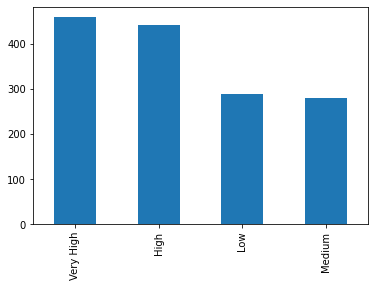

In [ ]:
data['JobSatisfaction'].value_counts().plot(kind='bar')

Transforming data to an ordinal category

In [ ]:
#data['JobSatisfaction'] = data['JobSatisfaction'].astype(dtype='category', 
#                               categories=['Low', 'Medium', 'High', 'Very High'],
#                               ordered=True)
#data['JobSatisfaction'].head()


from pandas.api.types import CategoricalDtype
data['JobSatisfaction'] = data['JobSatisfaction'].astype(CategoricalDtype(categories=['Low', 'Medium', 'High', 'Very High'],ordered=True))
data['JobSatisfaction'].head()


# DataFrame.astype() method is used to cast a pandas object to a 
# specified dtype. astype() function also provides the capability to 
# convert any suitable existing column to categorical type.

# Note : We have converted 'JobSatisfaction' column type from object to category
# Extra reference links 
# https://stackoverflow.com/questions/28910851/python-pandas-changing-some-column-types-to-categories
# benefits of Categorical data -> https://pbpython.com/pandas_dtypes_cat.html

EmployeeNumber
1    Very High
2       Medium
4         High
5         High
7       Medium
Name: JobSatisfaction, dtype: category
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Very High']

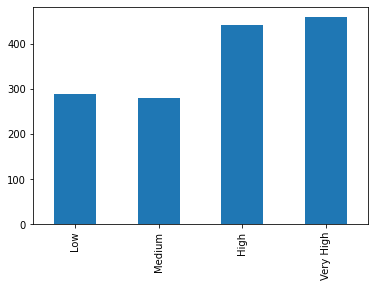

In [ ]:
data['JobSatisfaction'].value_counts(sort=False).plot(kind='bar')


<hr />

**Grouping operations**: Split-Apply-Combine operation.

By **grouping** or **group by** operations we are referring to a process involving one or more of the following steps:

- **Splitting** the data into groups based on some criteria
- **Applying** a function to each group independently
- **Combining** the results into a data structure

<b>Step1 (Split): </b> The <i>groupby</i> operation <b><i>splits</b></i> the dataframe into a group of dataframes based on some criteria. Note that the grouped object is <i>not</i> a dataframe. It is a GroupBy object. It has a dictionary-like structure and is also iterable.

<img src="https://drive.google.com/uc?id=1cFCjhdgRMpx1QY9SvLaaEOxPUN23SwLb">

<b>Step 2 (Analyze):</b> Once we have a grouped object we can <b><i>apply</b></i> functions or run analysis to each group, set of groups, or the entire group. 

<img src="https://drive.google.com/uc?id=1A4yFbbN6Yn5vwvWxIlZE88aDYIiIcglb">

<b>Step 3 (Combine):</b> We can also <b><i>combine</b></i> the results of the analysis into a new data structure(s). 

<img src="https://drive.google.com/uc?id=1N4eMrdV4K3Zkdn8CJ94BFVX_zTeREOiJ">

Since we are only interested in the employees with "Low" and "Very High" JobSatisfaction levels, let's create a new DataFrame containing only those observations.

In [ ]:
grouped = data.groupby('JobSatisfaction')

In [ ]:
grouped.groups  # groups is a predefined attribute of Grouped Object

{'Low': [10, 20, 27, 31, 33, 38, 51, 52, 54, 68, 70, 74, 75, 81, 86, 88, 100, 101, 113, 124, 133, 134, 145, 153, 170, 190, 197, 199, 200, 235, 239, 240, 241, 244, 250, 267, 274, 282, 288, 297, 299, 303, 328, 334, 339, 340, 347, 351, 362, 369, 374, 382, 390, 396, 412, 424, 425, 429, 451, 454, 474, 486, 510, 515, 517, 522, 524, 530, 532, 534, 536, 538, 549, 567, 573, 590, 605, 615, 625, 630, 648, 650, 662, 664, 667, 682, 684, 702, 705, 725, 728, 729, 732, 733, 742, 758, 764, 771, 775, 776, ...], 'Medium': [2, 7, 14, 21, 28, 35, 61, 85, 94, 95, 96, 103, 110, 119, 121, 132, 141, 151, 160, 161, 164, 178, 201, 202, 204, 206, 214, 218, 226, 233, 238, 247, 248, 252, 254, 258, 260, 269, 284, 296, 304, 305, 330, 355, 359, 363, 366, 376, 381, 384, 385, 394, 397, 399, 404, 406, 408, 410, 419, 421, 428, 433, 434, 436, 449, 458, 463, 464, 466, 471, 478, 488, 493, 494, 496, 497, 508, 511, 516, 518, 520, 554, 565, 581, 585, 597, 606, 614, 626, 635, 641, 643, 644, 657, 698, 699, 707, 712, 717, 738, ...

In [ ]:
grouped.get_group('Low').head()  # get_group would get all the data rows from the specified group
                                 # here we are fetching the 'Low' group data. 

Age Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
EmployeeNumber                 ...                                              
10               59        No  ...                       0                     0
20               29        No  ...                       8                     8
27               36       Yes  ...                       0                     3
31               34       Yes  ...                       1                     3
33               32       Yes  ...                       6                     7

[5 rows x 34 columns]

#### Age

In [ ]:
grouped['Age']

In [ ]:
grouped['Age'].mean()

JobSatisfaction
Low          36.916955
Medium       36.985714
High         37.022624
Very High    36.795207
Name: Age, dtype: float64

In [ ]:
grouped['Age'].describe()

count       mean       std   min   25%   50%   75%   max
JobSatisfaction                                                          
Low              289.0  36.916955  9.245496  19.0  30.0  36.0  42.0  60.0
Medium           280.0  36.985714  9.016898  18.0  31.0  36.0  43.0  58.0
High             442.0  37.022624  9.176992  18.0  30.0  36.0  43.0  59.0
Very High        459.0  36.795207  9.125609  18.0  30.0  35.0  43.0  60.0

In [ ]:
grouped['Age'].describe().unstack() # transpose the columns into rows
                                    # stack and unstack are reverse of each other. 
                                    # make sure of watching the video on Stacking & unstacking.

       JobSatisfaction
count  Low                289.000000
       Medium             280.000000
       High               442.000000
       Very High          459.000000
mean   Low                 36.916955
       Medium              36.985714
       High                37.022624
       Very High           36.795207
std    Low                  9.245496
       Medium               9.016898
       High                 9.176992
       Very High            9.125609
min    Low                 19.000000
       Medium              18.000000
       High                18.000000
       Very High           18.000000
25%    Low                 30.000000
       Medium              31.000000
       High                30.000000
       Very High           30.000000
50%    Low                 36.000000
       Medium              36.000000
       High                36.000000
       Very High           35.000000
75%    Low                 42.000000
       Medium              43.000000
       High    

<hr>
<h3><b>Click on the button below to Play <u>Stacking & unstacking in dataframes</u> Video:</b></h3>
<a href="https://drive.google.com/open?id=1arxXwLCGJ0Fe-joOPJ4BT_C0LKd892q2">
  <img src="https://drive.google.com/uc?id=14OOsd0HaKoMJjqu5YT5n7-HsvE6UVV7z" alt="Stacking_and_unstacking_video" width="130" height="70">
</a>

<hr>

#### Department

In [ ]:
grouped['Department'].value_counts().unstack()

NameError: ignored

In [ ]:
100*grouped['Department'].value_counts(normalize=True).unstack()

Department       Human Resources  Research & Development      Sales
JobSatisfaction                                                    
Low                     3.806228               66.435986  29.757785
Medium                  7.142857               62.142857  30.714286
High                    3.393665               67.873303  28.733032
Very High               3.703704               64.270153  32.026144

### Comparing the means across all numerical variables
<hr />

**Last Qn** : Compare the employees with Low and Very High JobSatisfaction across the following variables: Age, Department, DistanceFromHome, HourlyRate, MonthlyIncome and YearsAtCompany.

<font color='green'>Although we were asked for just some specific columns, to give the HR director a better picture of how these groups compare across different variables, let's create a DataFrame that contains the mean for every numeric variable in our dataset. </font>         

In [ ]:
# Getting the numerical columns


In [ ]:
# Creating an empty DataFrame


Age DailyRate  ... YearsSinceLastPromotion YearsWithCurrManager
Low        NaN       NaN  ...                     NaN                  NaN
Very High  NaN       NaN  ...                     NaN                  NaN

[2 rows x 24 columns]

In [ ]:
grouped['Age'].mean()

JobSatisfaction
Low          36.916955
Medium       36.985714
High         37.022624
Very High    36.795207
Name: Age, dtype: float64

In [ ]:
# Filling the DataFrame. Use for loop




In [ ]:
mean_comparison_df

Age   DailyRate  ...  YearsSinceLastPromotion  YearsWithCurrManager
Low        36.916955  782.505190  ...                 2.314879              4.384083
Very High  36.795207  802.069717  ...                 2.148148              4.074074

[2 rows x 24 columns]

In [ ]:
mean_comparison_df = mean_comparison_df.transpose()  # is very similar to stacking , unstacking. 
mean_comparison_df                                   # it interchanges the rows & columns
                                                     # stack and unstack method are more powerful due to levels and headers            

Low     Very High
Age                          36.916955     36.795207
DailyRate                   782.505190    802.069717
DistanceFromHome              9.190311      9.030501
Education                     2.944637      2.901961
EmployeeCount                 1.000000      1.000000
EnvironmentSatisfaction       2.743945      2.749455
HourlyRate                   68.636678     64.681917
JobInvolvement                2.761246      2.714597
JobLevel                      2.055363      2.052288
MonthlyIncome              6561.570934   6472.732026
MonthlyRate               14095.377163  14103.429194
NumCompaniesWorked            2.871972      2.516340
PercentSalaryHike            15.231834     15.440087
PerformanceRating             3.166090      3.172113
RelationshipSatisfaction      2.730104      2.701525
StandardHours                80.000000     80.000000
StockOptionLevel              0.788927      0.823529
TotalWorkingYears            11.608997     11.189542
TrainingTimesLastYear         2.816609      2.819172
WorkLifeBalance               2.771626      2.729847
YearsAtCompany                6.989619      6.962963
YearsInCurrentRole            4.276817      4.202614
YearsSinceLastPromotion       2.314879      2.148148
YearsWithCurrManager          4.384083      4.074074

<h3><font color='green'><b>Wow !! U have a finished a lots of problem solving.. this was indeed a <u>huge notebook</u></b></font></h3>

<b>I am sure you have understood by now that Python packages like NumPy , Pandas,</b> and <i>some more to come...</i> are all making our life easier. They are <b><u>shielding a lots of Applied Math & Python coding</u></b> under them. 

<h3><font color='green'><b>Before we wind up this NB, I would appreciate you <u>relaxing your mind</u> by watching this video on Math of Mathematics. </b></font></h3>

<a href="https://drive.google.com/open?id=1bR2HWp4hG-PCiXz6w1QHl1lc4EcIYiLz">
  <img src="https://drive.google.com/uc?id=1mCjrclA0Yxjp5faVhv4Zr0Y38OIV4036" alt="Just for Information_Map_of_Mathematics" width="180" height="120">
</a>


<small> Credits : This video is created by Domain of Science Team</small>

> In this second module, we learned about pandas, a library designed to do <b><u>Data Analysis</u></b> operations.

> In the next module, we will look at **Matplotlib**, the most popular library for **plotting in Python**.

<hr />

**Connect with the Author** of this Notebook <font color="darkgreen"><b>Prof Rocky Jagtiani</b></font> (https://www.linkedin.com/in/rocky-jagtiani-3b390649/)

<hr />

